In [58]:
# import library yang diperlukan

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
import pandas as pd

df = pd.read_csv('clickbait_data.csv')
df.tail()

,headline,clickbait
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
31999,Computer Makers Prepare to Stake Bigger Claim ...,0


In [60]:
# membagi attribut dan label
text = df['headline'].values
y = df['clickbait'].values

# split menggunakan train_test_split
text_latih, text_test, y_latih, y_test = train_test_split(text, y, test_size=0.2)

In [61]:
vocab_size = 5000
maxlen = 500
embbedding_size = 32

# Tokenize text (padding dan sequences)
tokenizer = Tokenizer(num_words=vocab_size, oov_token='x')
tokenizer.fit_on_texts(text)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=maxlen)
padded_test = pad_sequences(sekuens_test, maxlen=maxlen)

In [62]:
# latih model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embbedding_size, input_length=maxlen),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
# Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy','val_accuracy')>0.8):
      print("\nAkurasi telah mencapai >80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [64]:
num_epochs = 20
history = model.fit(padded_latih, y_latih, epochs=num_epochs, batch_size=512, 
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
50/50 - 45s - loss: 0.6932 - accuracy: 0.5066 - val_loss: 0.6930 - val_accuracy: 0.4930
Epoch 2/20
50/50 - 42s - loss: 0.6924 - accuracy: 0.5245 - val_loss: 0.6914 - val_accuracy: 0.5070
Epoch 3/20
50/50 - 42s - loss: 0.6861 - accuracy: 0.5849 - val_loss: 0.6724 - val_accuracy: 0.8278
Epoch 4/20
50/50 - 42s - loss: 0.6585 - accuracy: 0.8346 - val_loss: 0.6480 - val_accuracy: 0.9445

Akurasi telah mencapai >80%!


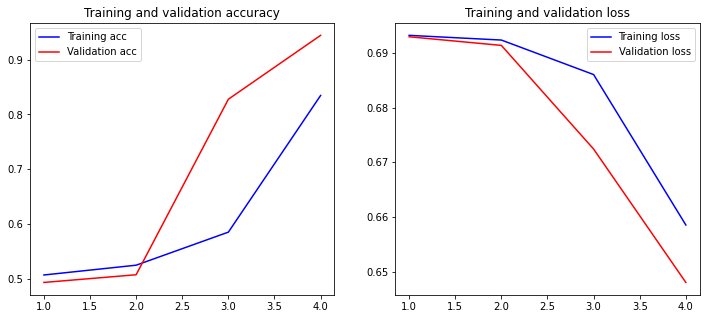

In [65]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()